# Removing duplicates with FiftyOne

To install fiftyOne, you can use a pip install command:

pip install fiftyone or pip install fiftyone[desktop] to install the desktop app as well. Use the first option.

Use a conda environment separate for fiftyone

In [1]:
import fiftyone as fo
import fiftyone.brain as fob
from fiftyone import ViewField as F

import os
import shutil


In [29]:
name = "datasetame" # Name of dataset, note, there will be an error which may show up in the next code block which says dataset name not found, just change the name again to anything and it will work.
dataset_dir = "/home/intern/Desktop/fiftyone_test/test_folder" # Path to dataset

new_images_dir = "/home/intern/Desktop/fiftyone_test/de_duplicate_dataset" # Path to new folder where images without duplicates will be stored
labels_dir = "/home/intern/Desktop/fiftyone_test/labels" # Path to folder where labels all labels with duplicates are stored

real_data_clean = "/home/intern/Desktop/fiftyone-scripts/clean"
real_data_dirty = "/home/intern/Desktop/fiftyone-scripts/dirty"
real_data_vehicle = "/home/intern/Desktop/fiftyone-scripts/vehicle"

<b> Dataset path: </b>

This is for the image dataset:
Foldername -> image1.ext, image2.ext

This is for the annotation dataset, will contain the bounding box information:
Foldername -> image1.txt, image2.txt

<b> Note: The image and annotation dataset should be separate folders. </b>

In [30]:
# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=real_data_vehicle,
    dataset_type=fo.types.ImageDirectory, # Or ImageClassificationDirectoryTree for classification dataset
    name=name,
)

print(dataset)

 100% |███████████████| 2656/2656 [430.8ms elapsed, 0s remaining, 6.2K samples/s]      
Name:        datasetame
Media type:  image
Num samples: 2656
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)


In [31]:
print(dataset.head(18))

[<Sample: {
    'id': '645e17dbc016c028691f1194',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scripts/vehicle/2023-01-19 00_14_23.798777.jpg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645e17dbc016c028691f1195',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scripts/vehicle/2023-01-19 00_14_23.798777_rotated.jpg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645e17dbc016c028691f1196',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scripts/vehicle/2023-01-19 00_20_40.498999.jpg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645e17dbc016c028691f1197',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scripts/vehicle/2023-01-19 00_20_40.498999_rotated.jpg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645e17dbc016c028691f1198',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scri

In [32]:
fob.compute_uniqueness(dataset) # Compute uniqueness of dataset image samples

print(dataset)

Computing embeddings...
 100% |███████████████| 2656/2656 [28.5s elapsed, 0s remaining, 92.0 samples/s]      
Computing uniqueness...
Uniqueness computation complete
Name:        datasetame
Media type:  image
Num samples: 2656
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    uniqueness: fiftyone.core.fields.FloatField


In [33]:
# View a sample from the dataset
print(dataset.first())

<Sample: {
    'id': '645e17dbc016c028691f1194',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone-scripts/vehicle/2023-01-19 00_14_23.798777.jpg',
    'tags': [],
    'metadata': None,
    'uniqueness': 0.725998612878136,
}>



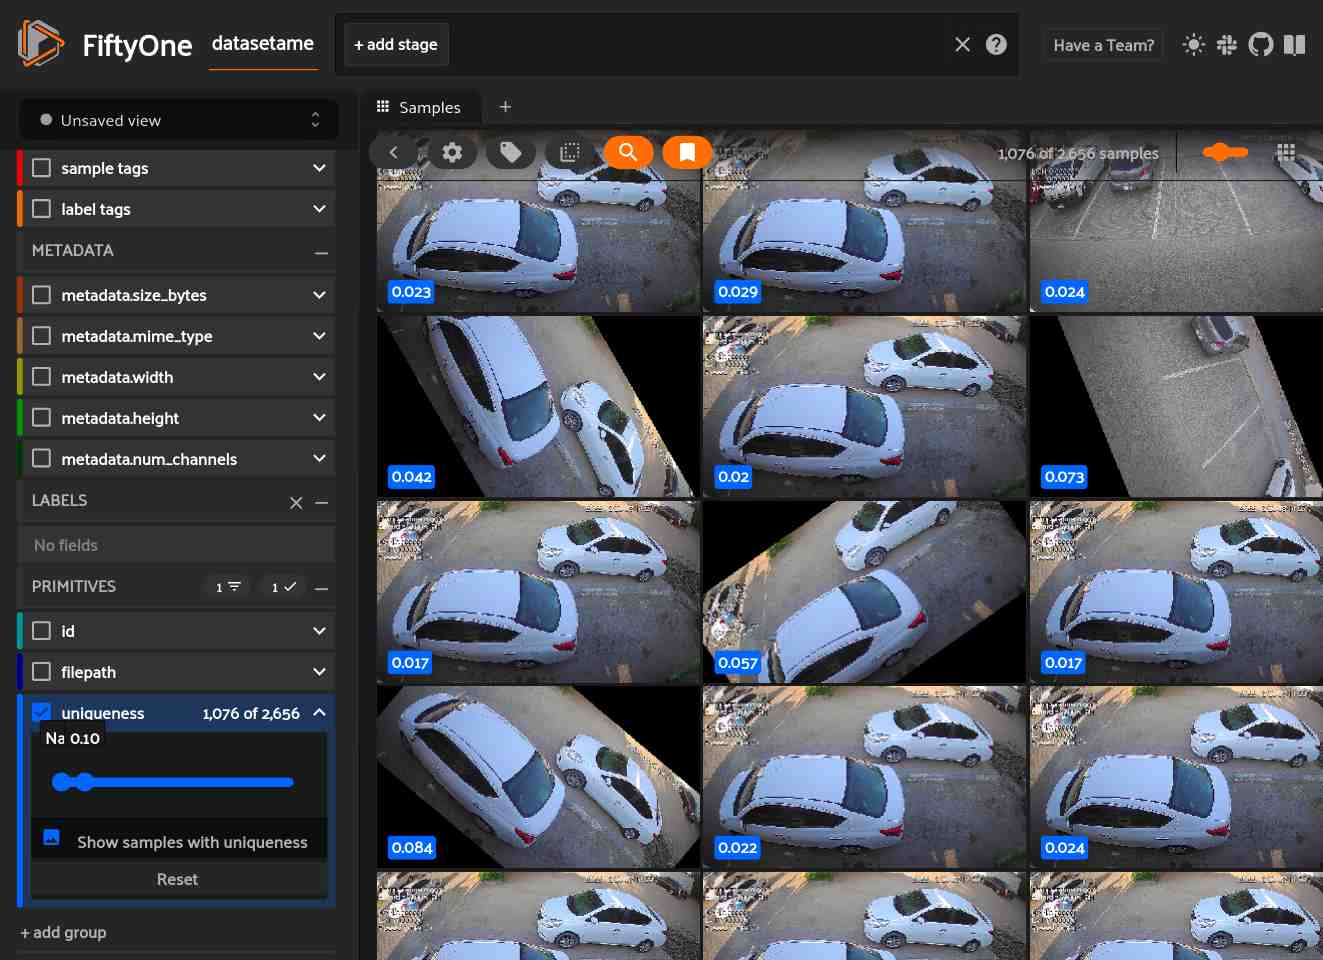

In [34]:
# View dataset in the App
session = fo.launch_app(dataset)

In [35]:
# Get a view of all samples with uniqueness == 0
# duplicates_view = dataset.match({"metadata.uniqueness": 0})
small_images_view = dataset.match(F("uniqueness") <= 0.10)

# Mark as duplicates
for sample in small_images_view:
    sample.tags.append("duplicate")
    sample.save()

In [36]:
print(small_images_view)

Dataset:     datasetame
Media type:  image
Num samples: 1076
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    uniqueness: fiftyone.core.fields.FloatField
View stages:
    1. Match(filter={'$expr': {'$lte': [...]}})


In [37]:
# Move the duplicate images to a new folder
small_images_view.export(new_images_dir, fo.types.ImageDirectory)

Directory '/home/intern/Desktop/fiftyone_test/de_duplicate_dataset' already exists; export will be merged with existing files
 100% |███████████████| 1076/1076 [3.5s elapsed, 0s remaining, 563.3 samples/s]         


The duplicates must be selected based on the uniqueness. If the uniqueness is 0, those will be duplicates and need to be selected in the fiftyone application.

In [ ]:
# # Get currently selected images from App
# dup_ids = session.selected
# print(dup_ids)

# # Get view containing selected samples
# dups_view = dataset.select(dup_ids)

# # Mark as duplicates
# for sample in dups_view:
#     sample.tags.append("duplicate")
#     sample.save()

['645b83faa730768b9742a83c', '645b83faa730768b9742a83d', '645b83faa730768b9742a840', '645b83faa730768b9742a83f', '645b83faa730768b9742a83e']


You can visualize the duplicates separately in the fiftyone application.

In [ ]:
# # Select samples with `duplicate` tag
# dups_tag_view = dataset.match_tags("duplicate")

# # Open view in App
# session.view = dups_tag_view

Use the code block below to export to a new folder with the duplicates removed.

In [ ]:
# # Get samples that do not have the `duplicate` tag
# no_dups_view = dataset.match(~F("tags").contains("duplicate"))

# # Export dataset to disk as a classification directory tree
# no_dups_view.export(
#     new_images_dir,
#     fo.types.ImageDirectory
# )

Directory '/home/intern/Desktop/fiftyone_test/de_duplicate_dataset' already exists; export will be merged with existing files
 100% |███████████████████| 14/14 [15.2ms elapsed, 0s remaining, 923.1 samples/s] 


Use the code block below to check if the duplicates exist in the new folder with comparison to the new directory and then delete the duplicates from the original folder.

In [39]:
# Check if files exist in the new folder with original dataset folder. If they do, delete them from the original dataset folder
for filename in os.listdir(new_images_dir):
    if filename in os.listdir(real_data_vehicle):
        os.remove(os.path.join(real_data_vehicle, filename))
        print("Removed: ", filename)

Removed:  output1_13025_rotated.jpg
Removed:  output1_15735_rotated.jpg
Removed:  output1_785.jpg
Removed:  output1_1280_rotated.jpg
Removed:  output1_1245.jpg
Removed:  output1_890_rotated.jpg
Removed:  output1_1105.jpg
Removed:  output1_5045.jpg
Removed:  output1_15285.jpg
Removed:  output1_5015.jpg
Removed:  output1_5090.jpg
Removed:  output1_1300.jpg
Removed:  output1_31485.jpg
Removed:  output1_890.jpg
Removed:  output1_15435.jpg
Removed:  output1_975.jpg
Removed:  output1_15340.jpg
Removed:  output1_5585_rotated.jpg
Removed:  output1_13000.jpg
Removed:  output1_14550_rotated.jpg
Removed:  output1_4325.jpg
Removed:  output1_6100.jpg
Removed:  output1_15515.jpg
Removed:  output1_14320_rotated.jpg
Removed:  output1_14685.jpg
Removed:  output1_32180.jpg
Removed:  output1_1030.jpg
Removed:  output1_15690.jpg
Removed:  output1_4890.jpg
Removed:  output1_15615.jpg
Removed:  output1_770.jpg
Removed:  output1_910.jpg
Removed:  output1_14375.jpg
Removed:  output1_31630.jpg
Removed:  output

Use the below code to check if the labels and images match. If the label does not match the image, it will be removed. This will help filter out the duplicate annotations from the label dataset.

In [ ]:
# Get a list of all image filenames
image_filenames = [os.path.splitext(filename)[0] for filename in os.listdir(new_images_dir)]

# Iterate over label filenames
for label_filename in os.listdir(labels_dir):
    # Get the corresponding image filename
    image_filename = os.path.splitext(label_filename)[0]
    # Check if the label filename matches an image filename
    if image_filename not in image_filenames:
        # Delete the label file
        label_path = os.path.join(labels_dir, label_filename)
        os.remove(label_path)
